In [3]:
# https://data-marketing-bk.tistory.com/entry/%EB%B2%A0%EC%9D%B4%EC%A7%80%EC%95%88-%EA%B8%B0%EC%B4%883-%EB%B2%A0%EC%9D%B4%EC%A7%80%EC%95%88%EC%9D%84-%ED%99%9C%EC%9A%A9%ED%95%9C-AB-Test-Google-Firebase-Logic
from __future__ import print_function, division
from builtins import range
 
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import beta
 
 
num_trials = 2000 ## 2천번 실험 예정
bandit_probabilities = [0.2, 0.5, 0.75] ## 각 slot machine 별 우승확률(prior information)

In [13]:
class bandit:
    def __init__(self, p):
        self.p = p ## 우승 확률 
        self.a = 1 ## 베타 분포 중 uniform 가정
        self.b = 1 ## 베타 분포 중 uniform 가정
        self.n = 0
        
    ## 실험 진행 - 빠친코 당기는 영역
    def pull(self):
        ## np.random 숫자 중에서 무작위 숫자를 반환하는데, 이 우승 확률이 기존 알고 있던 정보보다 작으면 true, 크면 false를 반환
        return np.random.random() < self.p
    
    
    ## 베르누이 샘플링
    def sample(self):
        return np.random.beta(self.a, self.b)
    
    
    ## 학습된 결과를 업데이트
    def update(self, x):
        self.a += x ## 성공한 횟수
        self.b += 1-x ## 그 반대니까
        self.n += 1
    


In [5]:
def plot(bandits, trial):
    x = np.linspace(0,1,200)
    for b in bandits:
        y = beta.pdf(x, b.a, b.b)
        plt.plot(x,y, label = f"realp: {b.p:.4f}, win rate = {b.a-1}/ {b.n}")
    plt.title(f"bandit distributions after {trial} trials")
    plt.legend()
    plt.show()


total reward earned: 1.0
overall win rate: 0.0005
num times selected each bandit: [0, 0, 1]
total reward earned: 1.0
overall win rate: 0.0005
num times selected each bandit: [0, 1, 1]
total reward earned: 2.0
overall win rate: 0.001
num times selected each bandit: [0, 1, 2]
total reward earned: 2.0
overall win rate: 0.001
num times selected each bandit: [1, 1, 2]
total reward earned: 2.0
overall win rate: 0.001
num times selected each bandit: [1, 1, 3]
total reward earned: 3.0
overall win rate: 0.0015
num times selected each bandit: [1, 1, 4]
total reward earned: 3.0
overall win rate: 0.0015
num times selected each bandit: [1, 1, 5]
total reward earned: 4.0
overall win rate: 0.002
num times selected each bandit: [1, 1, 6]
total reward earned: 5.0
overall win rate: 0.0025
num times selected each bandit: [1, 1, 7]
total reward earned: 6.0
overall win rate: 0.003
num times selected each bandit: [1, 1, 8]


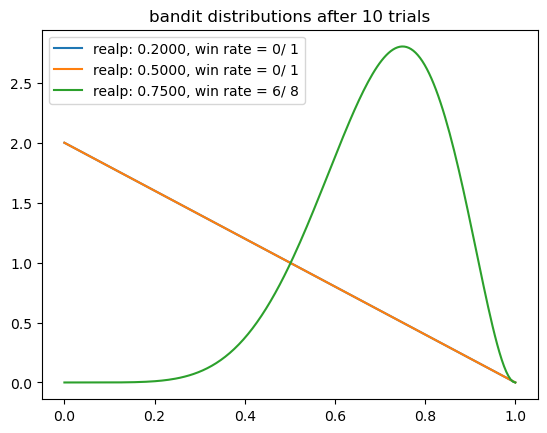

total reward earned: 7.0
overall win rate: 0.0035
num times selected each bandit: [1, 1, 9]
total reward earned: 7.0
overall win rate: 0.0035
num times selected each bandit: [1, 1, 10]
total reward earned: 8.0
overall win rate: 0.004
num times selected each bandit: [1, 1, 11]
total reward earned: 9.0
overall win rate: 0.0045
num times selected each bandit: [1, 2, 11]
total reward earned: 10.0
overall win rate: 0.005
num times selected each bandit: [1, 3, 11]
total reward earned: 10.0
overall win rate: 0.005
num times selected each bandit: [1, 4, 11]
total reward earned: 11.0
overall win rate: 0.0055
num times selected each bandit: [1, 4, 12]
total reward earned: 12.0
overall win rate: 0.006
num times selected each bandit: [1, 4, 13]
total reward earned: 13.0
overall win rate: 0.0065
num times selected each bandit: [1, 5, 13]
total reward earned: 14.0
overall win rate: 0.007
num times selected each bandit: [1, 6, 13]


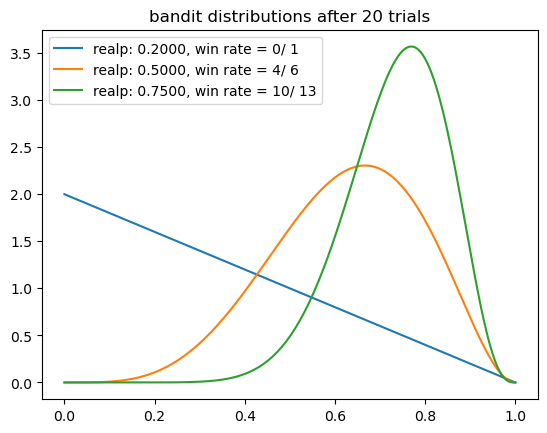

total reward earned: 15.0
overall win rate: 0.0075
num times selected each bandit: [1, 6, 14]
total reward earned: 16.0
overall win rate: 0.008
num times selected each bandit: [1, 7, 14]
total reward earned: 16.0
overall win rate: 0.008
num times selected each bandit: [1, 7, 15]
total reward earned: 16.0
overall win rate: 0.008
num times selected each bandit: [1, 7, 16]
total reward earned: 17.0
overall win rate: 0.0085
num times selected each bandit: [1, 7, 17]
total reward earned: 17.0
overall win rate: 0.0085
num times selected each bandit: [2, 7, 17]
total reward earned: 17.0
overall win rate: 0.0085
num times selected each bandit: [2, 8, 17]
total reward earned: 18.0
overall win rate: 0.009
num times selected each bandit: [2, 9, 17]
total reward earned: 19.0
overall win rate: 0.0095
num times selected each bandit: [2, 9, 18]
total reward earned: 20.0
overall win rate: 0.01
num times selected each bandit: [2, 9, 19]
total reward earned: 21.0
overall win rate: 0.0105
num times selec

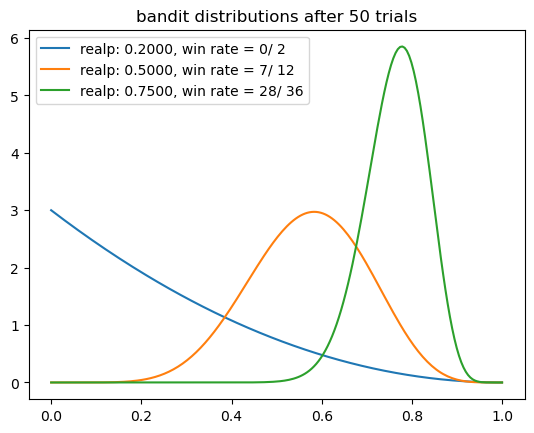

total reward earned: 36.0
overall win rate: 0.018
num times selected each bandit: [2, 12, 37]
total reward earned: 36.0
overall win rate: 0.018
num times selected each bandit: [2, 12, 38]
total reward earned: 36.0
overall win rate: 0.018
num times selected each bandit: [2, 12, 39]
total reward earned: 36.0
overall win rate: 0.018
num times selected each bandit: [2, 12, 40]
total reward earned: 37.0
overall win rate: 0.0185
num times selected each bandit: [2, 12, 41]
total reward earned: 37.0
overall win rate: 0.0185
num times selected each bandit: [2, 12, 42]
total reward earned: 37.0
overall win rate: 0.0185
num times selected each bandit: [2, 12, 43]
total reward earned: 38.0
overall win rate: 0.019
num times selected each bandit: [2, 13, 43]
total reward earned: 39.0
overall win rate: 0.0195
num times selected each bandit: [2, 13, 44]
total reward earned: 40.0
overall win rate: 0.02
num times selected each bandit: [2, 13, 45]
total reward earned: 41.0
overall win rate: 0.0205
num ti

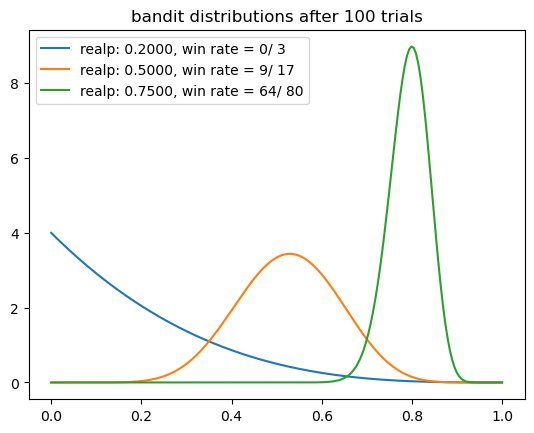

total reward earned: 74.0
overall win rate: 0.037
num times selected each bandit: [3, 17, 81]
total reward earned: 75.0
overall win rate: 0.0375
num times selected each bandit: [3, 17, 82]
total reward earned: 76.0
overall win rate: 0.038
num times selected each bandit: [3, 17, 83]
total reward earned: 77.0
overall win rate: 0.0385
num times selected each bandit: [3, 17, 84]
total reward earned: 78.0
overall win rate: 0.039
num times selected each bandit: [3, 17, 85]
total reward earned: 79.0
overall win rate: 0.0395
num times selected each bandit: [3, 17, 86]
total reward earned: 80.0
overall win rate: 0.04
num times selected each bandit: [3, 17, 87]
total reward earned: 81.0
overall win rate: 0.0405
num times selected each bandit: [3, 17, 88]
total reward earned: 82.0
overall win rate: 0.041
num times selected each bandit: [3, 17, 89]
total reward earned: 82.0
overall win rate: 0.041
num times selected each bandit: [3, 17, 90]
total reward earned: 82.0
overall win rate: 0.041
num tim

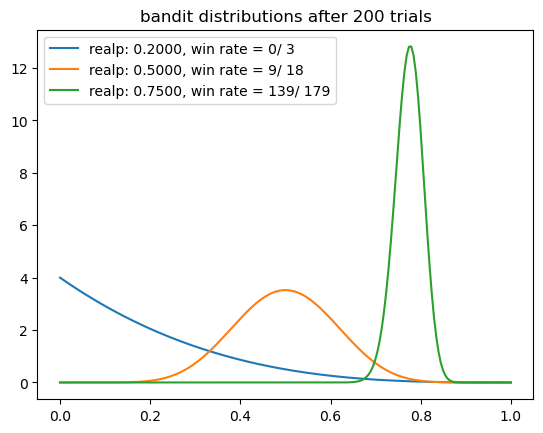

total reward earned: 149.0
overall win rate: 0.0745
num times selected each bandit: [3, 18, 180]
total reward earned: 149.0
overall win rate: 0.0745
num times selected each bandit: [3, 18, 181]
total reward earned: 150.0
overall win rate: 0.075
num times selected each bandit: [3, 18, 182]
total reward earned: 151.0
overall win rate: 0.0755
num times selected each bandit: [3, 18, 183]
total reward earned: 152.0
overall win rate: 0.076
num times selected each bandit: [3, 18, 184]
total reward earned: 153.0
overall win rate: 0.0765
num times selected each bandit: [3, 18, 185]
total reward earned: 154.0
overall win rate: 0.077
num times selected each bandit: [3, 18, 186]
total reward earned: 155.0
overall win rate: 0.0775
num times selected each bandit: [3, 18, 187]
total reward earned: 156.0
overall win rate: 0.078
num times selected each bandit: [3, 18, 188]
total reward earned: 157.0
overall win rate: 0.0785
num times selected each bandit: [3, 18, 189]
total reward earned: 158.0
overall

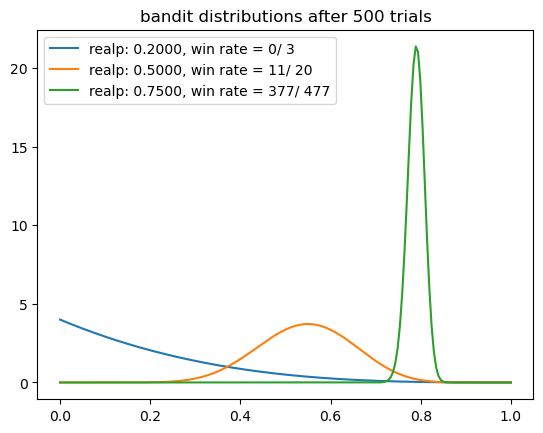

total reward earned: 389.0
overall win rate: 0.1945
num times selected each bandit: [3, 20, 478]
total reward earned: 390.0
overall win rate: 0.195
num times selected each bandit: [3, 20, 479]
total reward earned: 391.0
overall win rate: 0.1955
num times selected each bandit: [3, 20, 480]
total reward earned: 392.0
overall win rate: 0.196
num times selected each bandit: [3, 20, 481]
total reward earned: 392.0
overall win rate: 0.196
num times selected each bandit: [3, 20, 482]
total reward earned: 393.0
overall win rate: 0.1965
num times selected each bandit: [3, 20, 483]
total reward earned: 393.0
overall win rate: 0.1965
num times selected each bandit: [3, 20, 484]
total reward earned: 394.0
overall win rate: 0.197
num times selected each bandit: [3, 20, 485]
total reward earned: 395.0
overall win rate: 0.1975
num times selected each bandit: [3, 20, 486]
total reward earned: 396.0
overall win rate: 0.198
num times selected each bandit: [3, 20, 487]
total reward earned: 397.0
overall 

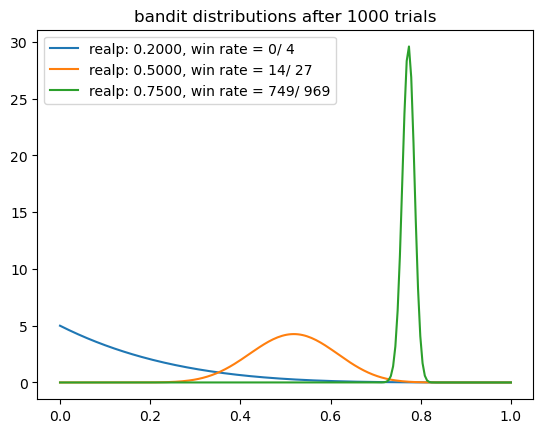

total reward earned: 764.0
overall win rate: 0.382
num times selected each bandit: [4, 27, 970]
total reward earned: 765.0
overall win rate: 0.3825
num times selected each bandit: [4, 27, 971]
total reward earned: 765.0
overall win rate: 0.3825
num times selected each bandit: [4, 27, 972]
total reward earned: 765.0
overall win rate: 0.3825
num times selected each bandit: [4, 27, 973]
total reward earned: 766.0
overall win rate: 0.383
num times selected each bandit: [4, 27, 974]
total reward earned: 766.0
overall win rate: 0.383
num times selected each bandit: [4, 27, 975]
total reward earned: 766.0
overall win rate: 0.383
num times selected each bandit: [4, 27, 976]
total reward earned: 767.0
overall win rate: 0.3835
num times selected each bandit: [4, 27, 977]
total reward earned: 768.0
overall win rate: 0.384
num times selected each bandit: [4, 27, 978]
total reward earned: 769.0
overall win rate: 0.3845
num times selected each bandit: [4, 27, 979]
total reward earned: 769.0
overall 

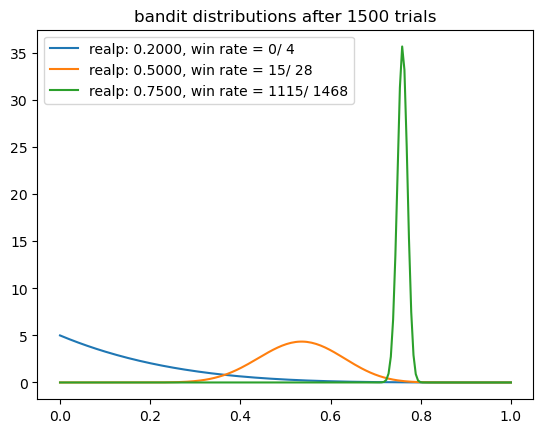

total reward earned: 1131.0
overall win rate: 0.5655
num times selected each bandit: [4, 28, 1469]
total reward earned: 1132.0
overall win rate: 0.566
num times selected each bandit: [4, 28, 1470]
total reward earned: 1132.0
overall win rate: 0.566
num times selected each bandit: [4, 28, 1471]
total reward earned: 1133.0
overall win rate: 0.5665
num times selected each bandit: [4, 28, 1472]
total reward earned: 1134.0
overall win rate: 0.567
num times selected each bandit: [4, 28, 1473]
total reward earned: 1135.0
overall win rate: 0.5675
num times selected each bandit: [4, 28, 1474]
total reward earned: 1135.0
overall win rate: 0.5675
num times selected each bandit: [4, 28, 1475]
total reward earned: 1135.0
overall win rate: 0.5675
num times selected each bandit: [4, 28, 1476]
total reward earned: 1136.0
overall win rate: 0.568
num times selected each bandit: [4, 28, 1477]
total reward earned: 1136.0
overall win rate: 0.568
num times selected each bandit: [4, 28, 1478]
total reward ea

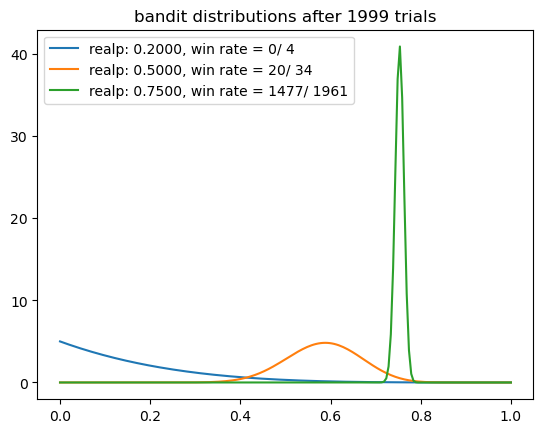

total reward earned: 1498.0
overall win rate: 0.749
num times selected each bandit: [4, 34, 1962]


'\npython\n    ## bandits[j].update(x)에서 일어나는 일 정리!\n        #X는 True or False임.\n        def update(self,x):\n            self.a += x ## uniform distribution\n            self.b += 1-x ## uniform distribution\n            self.n +=1   \n'

In [39]:
## 총3개의 bandit class가 들어오게 된다. 
bandits = [ bandit(p) for p in bandit_probabilities ]

sample_points = [10,20,50,100,200,500,1000,1500, 1999]

## 초기 reward는 그냥 다 null임
rewards = np.zeros(num_trials)

for i in range(num_trials):

    ## Thompson Sampling 진행
    ## 3개의 Bandit 중 샘플 3개가 나오게 되고
    ## 나온 3개의 Sample 중 가장 큰값의 Index를 반환하게 된다. 
    j = np.argmax( [b.sample() for b in bandits] )


    ## Posterior를 그려서 실험 진행 상황을 보여준다.
    if i in sample_points:
        plot(bandits, i)

    ## 가장 크다고 판단된 bandit의 실험 진행
    x = bandits[j].pull()
    
    ## update the results
    rewards[i] = x
    
    ## 실험이 진행된 x 결과를 bandit j의 prior로 사용하기 위해 update
    bandits[j].update(x)
    
    print("total reward earned:", rewards.sum())
    print("overall win rate:", rewards.sum() / num_trials)
    print("num times selected each bandit:", [b.n for b in bandits])
    
'''
python
    ## bandits[j].update(x)에서 일어나는 일 정리!
        #X는 True or False임.
        def update(self,x):
            self.a += x ## uniform distribution
            self.b += 1-x ## uniform distribution
            self.n +=1   
'''
    # print total reward
    

In [52]:
for i in range(10):
    print(np.random.beta(50, 50))

0.49315353975762044
0.5009585370886277
0.5890893562000888
0.5083303984962847
0.4880330713325671
0.4611452728634463
0.5234758407405006
0.4305917157515516
0.5126032636799673
0.5519516345268974
